In [1]:
import tensorflow as tf
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


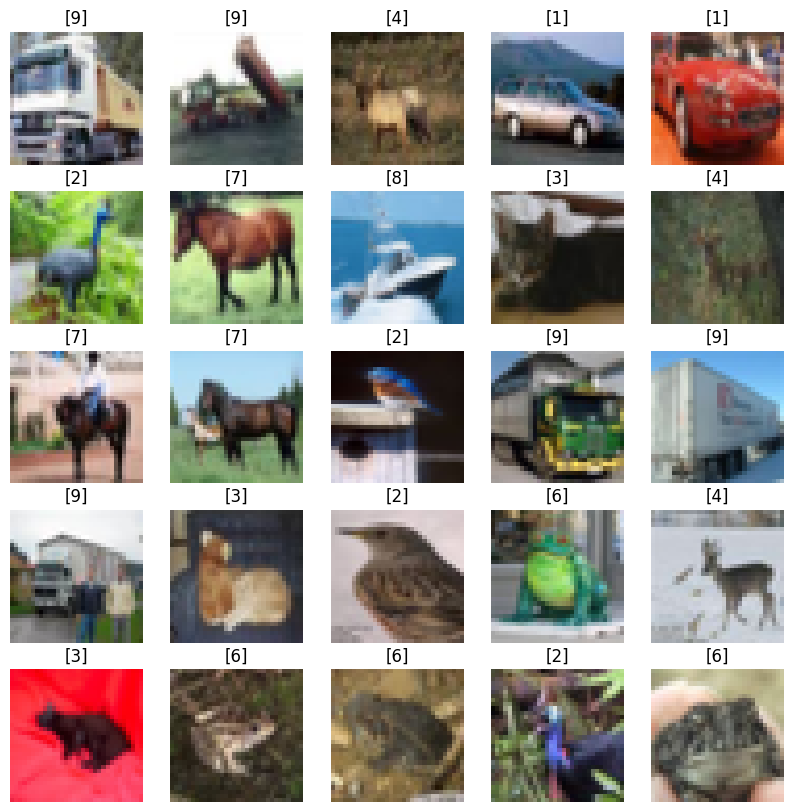

In [3]:
plt.figure(figsize = (10,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

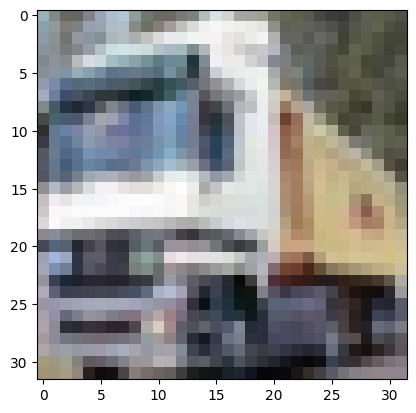

In [12]:
plt.imshow(x_train[1])
plt.show()

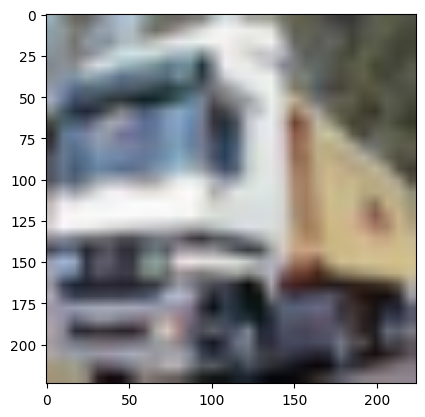

In [13]:
img = image.img_to_array(tf.image.resize(x_train[1], [224, 224],method=tf.image.ResizeMethod.BILINEAR))
plt.imshow(img.astype('int32'))
plt.show()

In [14]:
model = ResNet50(weights='imagenet')

In [15]:
x = np.expand_dims(img, axis=0)# 
x = np.array(x, copy=True)
x = preprocess_input(x)

In [16]:
preds = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [17]:
print("Predicted",decode_predictions(preds, top=5))

Predicted [[('n03796401', 'moving_van', 0.9991242), ('n04467665', 'trailer_truck', 0.00060136063), ('n03895866', 'passenger_car', 0.00016080859), ('n04483307', 'trimaran', 1.4026058e-05), ('n03126707', 'crane', 1.3718926e-05)]]


In [18]:
model = ResNet50(include_top=False,input_shape=(224,224,3))

In [19]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [20]:
for layer in model.layers:
    layer.trainable = False

In [21]:
x = model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1024,activation = 'relu')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(128,activation = 'relu')(x)
x = keras.layers.Dropout(0.3)(x)
output = keras.layers.Dense(10,activation='softmax')(x)

In [22]:
TLModel = keras.Model(inputs = model.input,outputs = output)
TLModel.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,818,378 (98.49 MB)

 Trainable params: 2,230,666 (8.51 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [39]:
# x_train = tf.image.resize(x_train/255.0,(224,224))
# x_test = tf.image.resize(x_test/255.0,(224,224))

In [23]:
np.unique(y_train[:1000],return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([102, 112,  99,  92,  99,  85, 107, 102,  99, 103], dtype=int64))

In [24]:
nx_train = x_train[:5000]
ny_train = y_train[:5000]

nx_test = x_test[:1000]
ny_test = y_test[:1000]

In [25]:
nx_train = tf.image.resize(nx_train,(224,224))
nx_test = tf.image.resize(nx_test,(224,224))

nx_train = preprocess_input(nx_train)
nx_test = preprocess_input(nx_test)

In [26]:
TLModel.compile(optimizer=keras.optimizers.Adam(),
                loss = keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [27]:
TLModel.fit(nx_train,ny_train,batch_size=32,epochs=20,validation_data=(nx_test,ny_test))

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.5381 - loss: 1.4907 - val_accuracy: 0.8350 - val_loss: 0.4707
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.8249 - loss: 0.5035 - val_accuracy: 0.8640 - val_loss: 0.4189
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.8698 - loss: 0.3861 - val_accuracy: 0.8730 - val_loss: 0.3964
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.8964 - loss: 0.3075 - val_accuracy: 0.8690 - val_loss: 0.4151
Epoch 5/20
 35/157 ━━━━━━━━━━━━━━━━━━━━ 1:54 942ms/step - accuracy: 0.9264 - loss: 0.2333


KeyboardInterrupt

